In [63]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


In [50]:
cd = pd.read_csv("D://assignments//assignment 7//crime_data.csv")

print(cd.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [4]:
cd.shape

(50, 5)

In [8]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
cd.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [19]:
cd[cd.duplicated()].shape

(0, 5)

# HIERARCHICAL CLUSTERING

In [20]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
df_norm = norm_func(cd.iloc[:,1:])

In [28]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


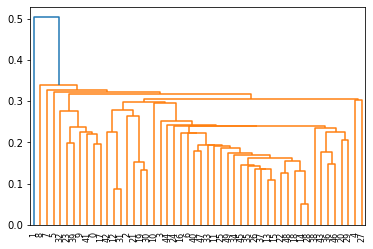

In [22]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [42]:
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [43]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [44]:
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [45]:
df_norm['h_clusterid'] = Clusters

In [46]:
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,1
9,1.000000,0.568493,0.474576,0.478036,0


# K Means

In [47]:
df_norm1 = norm_func(cd.iloc[:,1:])

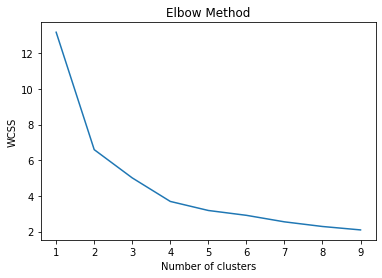

In [52]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_norm1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
clusters_new = KMeans(4, random_state=40)
clusters_new.fit_predict(df_norm1)


array([3, 0, 0, 3, 0, 0, 1, 1, 0, 3, 1, 2, 0, 1, 2, 1, 1, 3, 2, 0, 1, 0,
       2, 3, 1, 2, 2, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 1, 1, 3, 2, 3, 0, 1,
       2, 1, 1, 2, 2, 1])

In [60]:
df_norm1['clusterid_new'] = clusters_new.labels_

In [61]:
clusters_new.cluster_centers_

array([[0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.31726908, 0.32324962, 0.68549906, 0.30663221],
       [0.13805221, 0.10616438, 0.34039548, 0.1171404 ],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [62]:
df_norm1

,Murder,Assault,UrbanPop,Rape,clusterid_new
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,3
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,0
9,1.000000,0.568493,0.474576,0.478036,3


# DBSCAN

In [64]:
df_norm2 = norm_func(cd.iloc[:,1:])

In [78]:
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan.fit(df_norm2)

DBSCAN(eps=0.8, min_samples=10)

In [79]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [80]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [71]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [72]:
pd.concat([df_norm2,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,0
9,1.000000,0.568493,0.474576,0.478036,0
